In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


In [2]:
path = '/kaggle/input/avocado-prices/avocado.csv'

df = pd.read_csv(path)

In [3]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#dropping the column with the unnamed column
df.drop(df[['Unnamed: 0']],axis=1,inplace=True)

In [5]:
#import other packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [8]:
#missing values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing values.

# Data Distribution

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

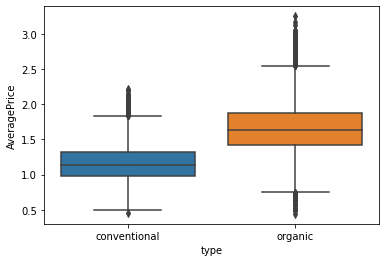

In [9]:
#average price by avocado type
sns.boxplot(x='type',y='AveragePrice',data=df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

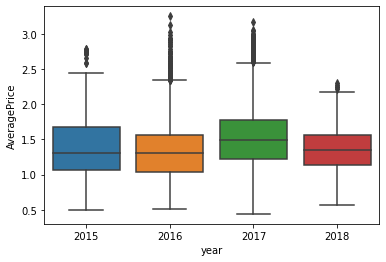

In [10]:
#Price by year
sns.boxplot(x='year',y='AveragePrice',data=df)

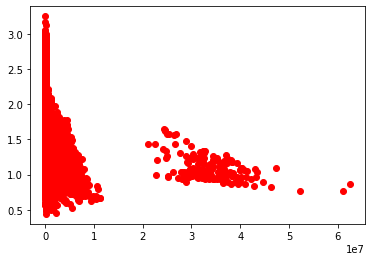

In [11]:
#price versus sales volume
plt.scatter(x='Total Volume',y='AveragePrice',data=df,color='red')

# Avocado Sales Volume

*Distribution of sales volume by PLU type and distribution of sales volume by bag size*

In [12]:
label1 = 'PLU4046','PLU4225','PLU4770'
label2 = 'Small Bags','Large Bags','XL Bags'

PLU4046 = int(df['4046'].sum())
PLU4225 = int(df['4225'].sum())
PLU4770 = int(df['4770'].sum())

small = int(df['Small Bags'].sum())
large = int(df['Large Bags'].sum())
xl = int(df['XLarge Bags'].sum())

plu_count = [PLU4046,PLU4225,PLU4770]
bags = [small,large,xl]

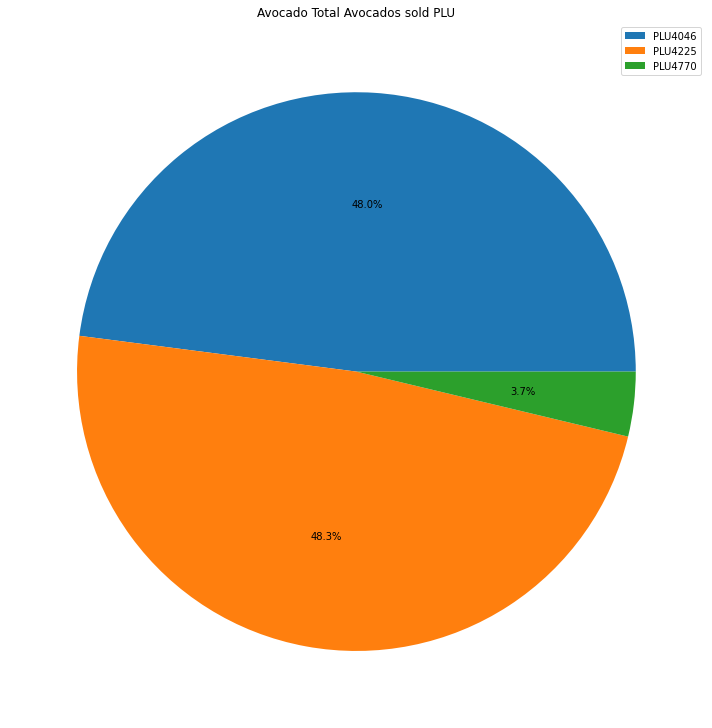

In [13]:
#make a circle diagram
# Creating plot 
plt.figure(figsize=(10,10))
plt.pie(plu_count, autopct='%1.1f%%')
plt.legend(label1, loc = "upper right")
plt.tight_layout()
plt.title("Avocado Total Avocados sold PLU")
  
# show plot 
plt.show() 

Avocados of PLU4770 type have a small sales volume.

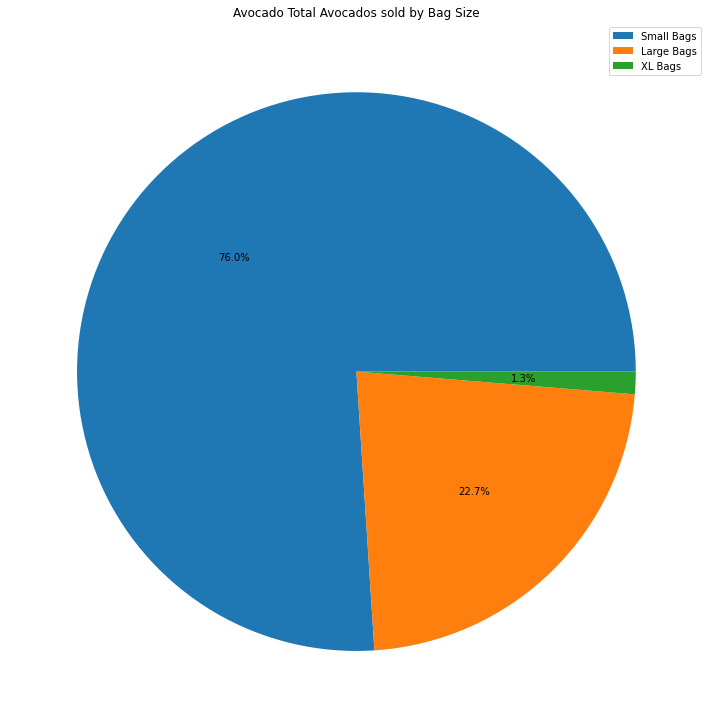

In [14]:
#make a circle diagram
# Creating plot 
plt.figure(figsize=(10,10))
plt.pie(bags, autopct='%1.1f%%')
plt.legend(label2, loc = "upper right")
plt.tight_layout()
plt.title("Avocado Total Avocados sold by Bag Size")
  
# show plot 
plt.show() 

Large share of small bags are sold.

# Avocado Revenue 

In [15]:
#Revenue each year
df['revenue_daily'] = df['AveragePrice']*df['Total Volume']
df['revenue_plu4046'] = df['AveragePrice']*df['4046']
df['revenue_plu4225'] = df['AveragePrice']*df['4225']
df['revenue_plu4770'] = df['AveragePrice']*df['4770']

In [16]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue_daily,revenue_plu4046,revenue_plu4225,revenue_plu4770
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046,1378.8642,72424.9505,64.0528
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230,910.2780,60262.3935,78.7455
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046,739.0710,101509.1931,121.3650
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220,1222.5600,77734.5228,78.3864
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880,1205.0944,56113.1392,96.9984


<AxesSubplot:xlabel='year', ylabel='revenue_daily'>

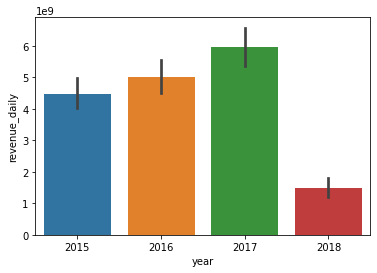

In [17]:
#Total Revenue each year
sns.barplot(x='year', y='revenue_daily', estimator = sum, data=df)

<AxesSubplot:xlabel='year', ylabel='revenue_daily'>

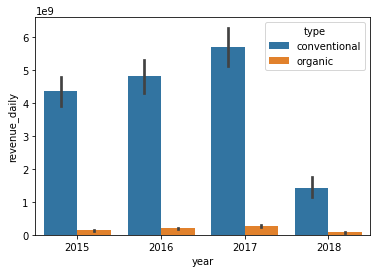

In [18]:
#Revenue by type and year
sns.barplot(x='year', y='revenue_daily', hue='type', estimator = sum, data=df)

In [19]:
#data barplot
revenue_year = df.groupby(['year']).revenue_daily.sum().reset_index() 
revenue_year

,year,revenue_daily
0,2015,4.488448e+09
1,2016,4.997590e+09
2,2017,5.965750e+09
3,2018,1.482343e+09


Text(0.5, 0, 'Year')

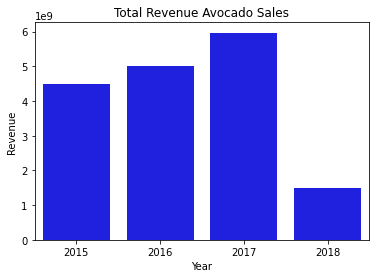

In [20]:
#Revenue by year plot
sns.barplot(x='year', y='revenue_daily', data=revenue_year,color='blue')
plt.title("Total Revenue Avocado Sales")
plt.ylabel("Revenue")
plt.xlabel("Year")


In [21]:
#Revenue by year and PLU
revenue_year_plu4046 = df.groupby(['year']).revenue_plu4046.sum().reset_index() 
revenue_year_plu4225 = df.groupby(['year']).revenue_plu4225.sum().reset_index() 
revenue_year_plu4770 = df.groupby(['year']).revenue_plu4770.sum().reset_index() 

revenue_year_plu4046['PLU'] = "4046"
revenue_year_plu4225['PLU'] = "4225"
revenue_year_plu4770['PLU'] = "4770"

revenue_year_plu4046 = revenue_year_plu4046.rename(columns={'revenue_plu4046':'revenue'})
revenue_year_plu4225 = revenue_year_plu4225.rename(columns={'revenue_plu4225':'revenue'})
revenue_year_plu4770 = revenue_year_plu4770.rename(columns={'revenue_plu4770':'revenue'})

frames = [revenue_year_plu4046,revenue_year_plu4225,revenue_year_plu4770]

results = pd.concat(frames)
results

,year,revenue,PLU
0,2015,1.681794e+09,4046
1,2016,1.511538e+09,4046
2,2017,1.915786e+09,4046
3,2018,4.724571e+08,4046
0,2015,1.848692e+09,4225
1,2016,1.795002e+09,4225
2,2017,1.945466e+09,4225
3,2018,4.537754e+08,4225
0,2015,1.476446e+08,4770
1,2016,1.598403e+08,4770


Text(0.5, 0, 'Year')

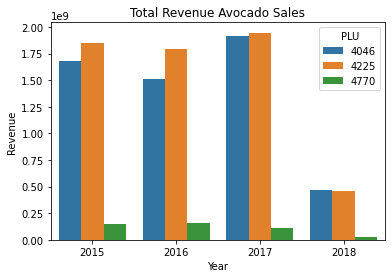

In [22]:
#Bar Plot
sns.barplot(x='year', y='revenue', hue='PLU', data=results)
plt.title("Total Revenue Avocado Sales")
plt.ylabel("Revenue")
plt.xlabel("Year")

# Polynomial Regression

[Text(0.5, 0, 'AveragePrice'),
 Text(1.5, 0, 'Total Volume'),
 Text(2.5, 0, '4046'),
 Text(3.5, 0, '4225'),
 Text(4.5, 0, '4770'),
 Text(5.5, 0, 'Total Bags'),
 Text(6.5, 0, 'Small Bags'),
 Text(7.5, 0, 'Large Bags'),
 Text(8.5, 0, 'XLarge Bags'),
 Text(9.5, 0, 'year'),
 Text(10.5, 0, 'revenue_daily'),
 Text(11.5, 0, 'revenue_plu4046'),
 Text(12.5, 0, 'revenue_plu4225'),
 Text(13.5, 0, 'revenue_plu4770')]

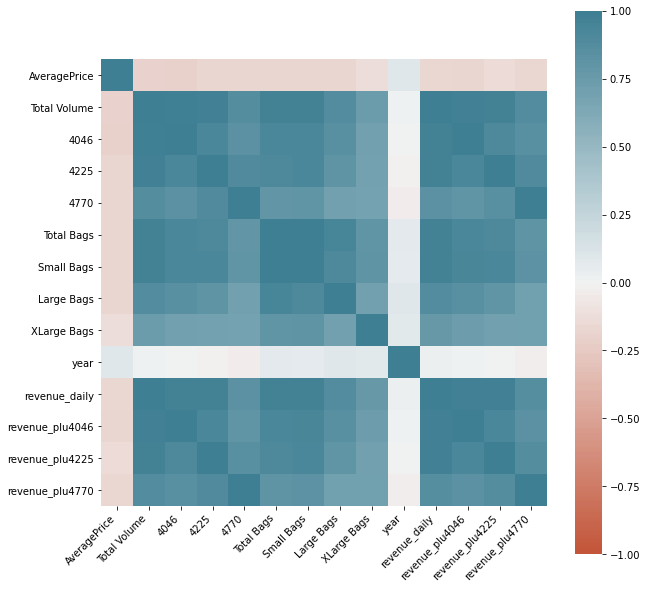

In [23]:
#correlation of variables: correlation diagram
fig, ax = plt.subplots(figsize=(10,10))
corr = df.corr()

ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [24]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import sklearn.pipeline as pp

from sklearn import linear_model

In [25]:
avocado_new = df[['AveragePrice','Total Volume']]
avocado_new.head()

,AveragePrice,Total Volume
0,1.33,64236.62
1,1.35,54876.98
2,0.93,118220.22
3,1.08,78992.15
4,1.28,51039.60


How are average price and volume associated?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AveragePrice'>

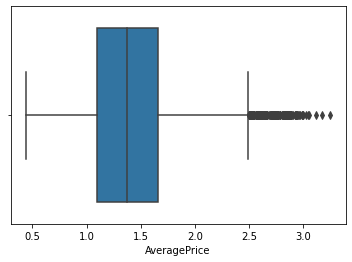

In [26]:
sns.boxplot(avocado_new['AveragePrice'])

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

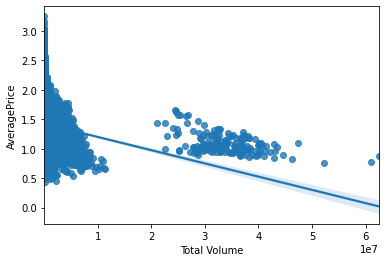

In [27]:
#create a regplot to see the correlation
sns.regplot(x='Total Volume',y='AveragePrice',data=avocado_new)

You expect a linear relationship between the variables volume and price, but the data point poorly fit a linear model.

In [28]:
avocado_new.shape

(18249, 2)

In [29]:
feature = avocado_new[['Total Volume']]
x= feature
y = avocado_new['AveragePrice']

In [30]:
#split the data in a train and test set
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
print ('The length of the train set is:', x_train.shape,  y_train.shape)
print ('The lenth of the test set equals:', x_test.shape,  y_test.shape)

The length of the train set is: (12774, 1) (12774,)
The lenth of the test set equals: (5475, 1) (5475,)


In [31]:
#Polynomial transformation to the second order
y_poly=PolynomialFeatures(degree=2)
x_train_poly=y_poly.fit_transform(x_train)   #this is for the training data
x_test_poly=y_poly.fit_transform(x_test)   # this is for the test data

In [32]:
model_avocado_price = linear_model.LinearRegression()
model_avocado_price.fit(x_train_poly, y_train)


LinearRegression()

In [33]:
#Model evaluation metric
#R-squared using the test data
r_squared_polynomial = model_avocado_price.score(x_test_poly, y_test)
print("The R-squared equals:")
r_squared_polynomial

The R-squared equals:


0.08302228122736255

In [34]:
#The Model
# add a constant
x2 = sm.add_constant(x_train)

pg_stats_model = sm.OLS(y_train, x2)

# fit the model
results = pg_stats_model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     509.7
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          1.09e-110
Time:                        09:32:43   Log-Likelihood:                -6291.2
No. Observations:               12774   AIC:                         1.259e+04
Df Residuals:                   12772   BIC:                         1.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4279      0.004    395.312   

The model is poorly estimated.

**This is the end of this analysis.**